# The Cancer Gene Atlas Cancer (TCGA) - Lymphoid Neoplasm Diffuse Large B-cell Lymphoma (DLBC)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Wed Apr 25 14:17:15 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Lymphoid Neoplasm Diffuse Large B-cell Lymphoma [DLBC]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-FF-8046,1786,DLBC,TCGA,67325322-483f-443f-9ffa-2a20d108a2fb,FF,51.0,NaN,212,Nationwide Children's Hospital,NaN,...,25.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-FF-8041,4772,DLBC,TCGA,1f971af1-6772-4fe6-8d35-bbe527a037fe,FF,28.0,NaN,212,Nationwide Children's Hospital,NaN,...,19.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-FA-A7Q1,5163,DLBC,TCGA,0030A28C-81AA-44B0-8BE0-B35E1DCBF98C,FA,61.0,NaN,397,Nationwide Children's Hospital,NaN,...,26.4,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-G8-6326,5164,DLBC,TCGA,f8cf647b-1447-4ac3-8c43-bef07765cabf,G8,52.0,NaN,212,Nationwide Children's Hospital,NaN,...,37.3,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-FF-A7CX,5174,DLBC,TCGA,29E3D122-15A1-4235-A356-B1A9F94CEB39,FF,46.0,NaN,397,Nationwide Children's Hospital,NaN,...,21.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(48, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_DLBC_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,bf622082-b075-4456-a7d8-8d35c3cf42b7,180327a6-0c80-4f87-baab-dd6f10e76660,da80d965-debd-4791-aa41-c9c61d8ccdf1,1070cc0e-0ba1-467a-bcd9-cc0b527a1c2b,6a60625e-3816-41c5-ab06-429625a99107,be7df1d5-0202-4661-a1fc-f77c10ed4952,70a798e9-fbc9-4a0d-bce8-76d72e55c372,c2a75ae0-90c4-4ad7-b384-884fa95aadf3,f43220be-dd8d-4f7b-9429-c8ba02a7f2fe,6e013367-6a7f-4cdd-91af-02c28c1a3fd9,...,80b15278-f9e9-4aec-a966-57a21bfa8b2a,47620f3d-de37-4e4b-9623-593ee7523456,d80a5c0b-a9ae-4e03-802b-9819c2e25e83,5bbec12d-c0a3-4156-853a-ee09a6986b55,5a8df9b5-1dbc-4a02-b6c5-52679f2cfb21,516a0793-b2b1-46b2-b481-41bb4be6e58f,511a285f-8102-4ff1-8b96-b5bc265da8c0,94f79cc1-28f0-4fca-a56c-e98b406598c0,ba778fb3-08d1-4129-bea6-c1d3d53fd1ea,107b2324-ed35-4568-9ee8-abee11770d69
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,145.542000,120.27500,134.306000,152.601000,180.5990,174.831000,167.4560,90.70830,206.606000,200.888000,...,72.041800,81.95880,113.39400,129.209000,136.818000,228.02200,60.34570,93.02910,76.22220,90.891300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.436900,47.64880,26.617900,37.463100,12.5831,8.616430,13.7503,8.49939,11.568800,21.397700,...,25.588800,54.70250,75.56730,29.904100,54.555200,5.61595,2.65881,109.65600,49.84680,69.198000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,11.589500,13.79590,17.750700,10.301100,17.1981,30.451600,10.8560,12.20100,6.731100,13.779400,...,13.609300,7.77693,11.85100,14.586000,19.889900,5.85819,7.10348,13.94830,18.93630,9.704330
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,15.724800,71.00510,25.785200,28.467000,37.9710,20.645200,25.3433,42.50790,37.325600,33.343900,...,53.720900,33.91440,18.37510,52.084900,35.657500,23.13000,31.03340,11.90560,40.42100,23.205300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.153237,1.27692,0.416522,0.310962,0.2027,0.087805,0.0000,0.00000,0.090346,0.146176,...,0.685796,6.86001,2.15153,0.914474,0.515198,0.00000,0.00000,1.97896,0.83846,0.988563


In [19]:
matrix.shape

(199169, 48)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,bf622082-b075-4456-a7d8-8d35c3cf42b7,180327a6-0c80-4f87-baab-dd6f10e76660,da80d965-debd-4791-aa41-c9c61d8ccdf1,1070cc0e-0ba1-467a-bcd9-cc0b527a1c2b,6a60625e-3816-41c5-ab06-429625a99107,be7df1d5-0202-4661-a1fc-f77c10ed4952,70a798e9-fbc9-4a0d-bce8-76d72e55c372,c2a75ae0-90c4-4ad7-b384-884fa95aadf3,f43220be-dd8d-4f7b-9429-c8ba02a7f2fe,6e013367-6a7f-4cdd-91af-02c28c1a3fd9,...,80b15278-f9e9-4aec-a966-57a21bfa8b2a,47620f3d-de37-4e4b-9623-593ee7523456,d80a5c0b-a9ae-4e03-802b-9819c2e25e83,5bbec12d-c0a3-4156-853a-ee09a6986b55,5a8df9b5-1dbc-4a02-b6c5-52679f2cfb21,516a0793-b2b1-46b2-b481-41bb4be6e58f,511a285f-8102-4ff1-8b96-b5bc265da8c0,94f79cc1-28f0-4fca-a56c-e98b406598c0,ba778fb3-08d1-4129-bea6-c1d3d53fd1ea,107b2324-ed35-4568-9ee8-abee11770d69
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,145.542000,120.27500,134.306000,152.601000,180.5990,174.831000,167.4560,90.70830,206.606000,200.888000,...,72.041800,81.95880,113.39400,129.209000,136.818000,228.02200,60.34570,93.02910,76.22220,90.891300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.436900,47.64880,26.617900,37.463100,12.5831,8.616430,13.7503,8.49939,11.568800,21.397700,...,25.588800,54.70250,75.56730,29.904100,54.555200,5.61595,2.65881,109.65600,49.84680,69.198000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,11.589500,13.79590,17.750700,10.301100,17.1981,30.451600,10.8560,12.20100,6.731100,13.779400,...,13.609300,7.77693,11.85100,14.586000,19.889900,5.85819,7.10348,13.94830,18.93630,9.704330
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,15.724800,71.00510,25.785200,28.467000,37.9710,20.645200,25.3433,42.50790,37.325600,33.343900,...,53.720900,33.91440,18.37510,52.084900,35.657500,23.13000,31.03340,11.90560,40.42100,23.205300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.153237,1.27692,0.416522,0.310962,0.2027,0.087805,0.0000,0.00000,0.090346,0.146176,...,0.685796,6.86001,2.15153,0.914474,0.515198,0.00000,0.00000,1.97896,0.83846,0.988563


In [22]:
matrix.shape

(79930, 48)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,145.542000,120.27500,134.306000,152.601000,180.5990,174.831000,167.4560,90.70830,206.606000,200.888000,...,72.041800,81.95880,113.39400,129.209000,136.818000,228.02200,60.34570,93.02910,76.22220,90.891300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.436900,47.64880,26.617900,37.463100,12.5831,8.616430,13.7503,8.49939,11.568800,21.397700,...,25.588800,54.70250,75.56730,29.904100,54.555200,5.61595,2.65881,109.65600,49.84680,69.198000
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,11.589500,13.79590,17.750700,10.301100,17.1981,30.451600,10.8560,12.20100,6.731100,13.779400,...,13.609300,7.77693,11.85100,14.586000,19.889900,5.85819,7.10348,13.94830,18.93630,9.704330
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,15.724800,71.00510,25.785200,28.467000,37.9710,20.645200,25.3433,42.50790,37.325600,33.343900,...,53.720900,33.91440,18.37510,52.084900,35.657500,23.13000,31.03340,11.90560,40.42100,23.205300
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.153237,1.27692,0.416522,0.310962,0.2027,0.087805,0.0000,0.00000,0.090346,0.146176,...,0.685796,6.86001,2.15153,0.914474,0.515198,0.00000,0.00000,1.97896,0.83846,0.988563


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
ARF5,145.542000,120.27500,134.306000,152.601000,180.5990,174.831000,167.4560,90.70830,206.606000,200.888000,...,72.041800,81.95880,113.39400,129.209000,136.818000,228.02200,60.34570,93.02910,76.22220,90.891300
M6PR,16.436900,47.64880,26.617900,37.463100,12.5831,8.616430,13.7503,8.49939,11.568800,21.397700,...,25.588800,54.70250,75.56730,29.904100,54.555200,5.61595,2.65881,109.65600,49.84680,69.198000
ESRRA,11.589500,13.79590,17.750700,10.301100,17.1981,30.451600,10.8560,12.20100,6.731100,13.779400,...,13.609300,7.77693,11.85100,14.586000,19.889900,5.85819,7.10348,13.94830,18.93630,9.704330
FKBP4,15.724800,71.00510,25.785200,28.467000,37.9710,20.645200,25.3433,42.50790,37.325600,33.343900,...,53.720900,33.91440,18.37510,52.084900,35.657500,23.13000,31.03340,11.90560,40.42100,23.205300
CYP26B1,0.153237,1.27692,0.416522,0.310962,0.2027,0.087805,0.0000,0.00000,0.090346,0.146176,...,0.685796,6.86001,2.15153,0.914474,0.515198,0.00000,0.00000,1.97896,0.83846,0.988563


# Histogram of First Sample

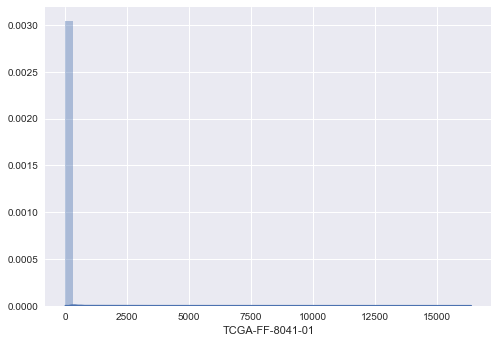

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

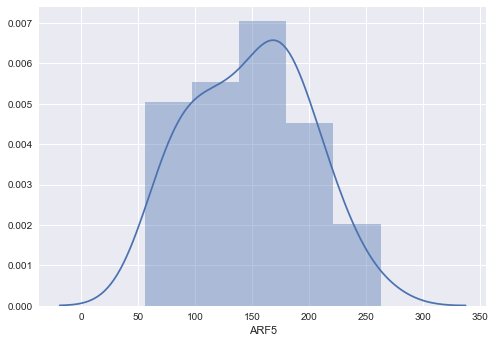

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_dlbc_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
A1BG,0.029646,0.027487,0.029646,0.029646,0.029646,0.029646,0.019403,0.029646,0.029646,0.029646,...,0.027092,0.020062,0.029646,0.029646,0.047842,0.029646,0.029646,0.029646,0.029646,0.029646
A1CF,0.016992,0.014766,0.004503,0.015122,0.004999,0.017541,0.012473,0.015216,0.011307,0.007422,...,0.005621,0.011561,0.023125,0.016605,0.008507,0.015216,0.002107,0.010704,0.028029,0.011431
A2M,26.839500,127.853000,48.127100,75.521100,20.416900,34.893500,11.781700,59.221500,35.494100,26.752600,...,47.222800,40.770100,143.789000,119.490000,39.703200,18.842400,17.137700,66.235400,46.575900,93.745200
A2ML1,0.223037,0.069567,1.824610,0.045985,0.080915,0.027294,0.144267,0.167412,0.056301,0.184446,...,0.049506,0.024885,0.051051,0.048279,1.490060,0.041327,0.030001,4.700070,0.309698,0.033487
A3GALT2,0.037271,0.041859,0.022387,0.022387,0.019628,0.018026,0.018031,0.022387,0.022387,0.022387,...,0.022387,0.022387,0.022387,0.022387,0.041049,0.022387,0.022387,0.022387,0.023769,0.022387


In [34]:
normalized_matrix.shape

(19517, 48)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
A1BG,-1.332391,-1.325376,-1.341202,-1.322485,-1.318618,-1.319280,-1.462872,-1.267843,-1.318901,-1.325591,...,-1.379322,-1.511157,-1.279585,-1.322596,-1.136558,-1.303966,-1.300991,-1.330150,-1.331389,-1.264045
A1CF,-1.574120,-1.595259,-2.159693,-1.614839,-2.091703,-1.547187,-1.654759,-1.557502,-1.737525,-1.927030,...,-2.062363,-1.750514,-1.387474,-1.574310,-1.886575,-1.593624,-2.449234,-1.772572,-1.355740,-1.677920
A2M,1.624420,2.342203,1.869224,2.083620,1.519408,1.751501,1.320464,2.032673,1.759291,1.629811,...,1.861990,1.796813,2.406177,2.282772,1.782462,1.499207,1.460998,2.018976,1.864809,2.235941
A2ML1,-0.455977,-0.922106,0.448004,-1.131828,-0.882553,-1.355170,-0.591577,-0.516020,-1.040350,-0.531686,...,-1.117506,-1.417589,-1.043544,-1.110805,0.356840,-1.159693,-1.295812,0.869991,-0.312414,-1.211127
A3GALT2,-1.232983,-1.142720,-1.463171,-1.444453,-1.497697,-1.535349,-1.494716,-1.389812,-1.440870,-1.447560,...,-1.462167,-1.463534,-1.401554,-1.444564,-1.203065,-1.425934,-1.422960,-1.452119,-1.427334,-1.386013


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
A1BG,-1.243687,-1.390432,-1.291491,-1.334813,-1.258425,-1.261198,-1.391567,-1.367322,-1.257745,-1.326198,...,-1.257313,-1.491689,-1.412606,-1.322944,-1.125986,-1.289982,-1.272735,-1.349378,-1.375701,-1.328074
A1CF,-1.491083,-1.686212,-2.096009,-1.637726,-2.055400,-1.490739,-1.564544,-1.667350,-1.689194,-1.934699,...,-1.848039,-1.742733,-1.529110,-1.585826,-1.895094,-1.615904,-2.403409,-1.813553,-1.397801,-1.738450
A2M,1.672705,2.257726,1.903978,2.043650,1.515632,1.768851,1.347746,2.103134,1.817993,1.629653,...,1.922509,1.758773,2.380762,2.239904,1.781887,1.574068,1.688356,1.923247,1.757718,2.176997
A2ML1,-0.312970,-0.998801,0.510226,-1.143570,-0.800554,-1.300983,-0.456685,-0.593188,-0.960179,-0.555435,...,-0.994644,-1.396158,-1.171563,-1.100414,0.272838,-1.142742,-1.267335,0.695005,-0.461099,-1.276177
A3GALT2,-1.148699,-1.209976,-1.408481,-1.456558,-1.438721,-1.474840,-1.419206,-1.495732,-1.383167,-1.454293,...,-1.335127,-1.440678,-1.543913,-1.455507,-1.193574,-1.426066,-1.408481,-1.480846,-1.472826,-1.456166


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-FF-8041-01,TCGA-GR-A4D9-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-FF-8042-01,TCGA-FF-8043-01,TCGA-FF-8047-01,TCGA-FF-8046-01,TCGA-FF-8061-01,TCGA-FF-8062-01,...,TCGA-GS-A9TQ-01,TCGA-GS-A9TW-01,TCGA-GS-A9TU-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-GS-A9TY-01,TCGA-RQ-AAAT-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U4-01,TCGA-GS-A9U3-01
A1BG,0.970785,-1.465913,0.176993,-0.542372,0.726062,0.680017,-1.484771,-1.082172,0.737354,-0.399304,...,0.744518,-3.147292,-1.834120,-0.345278,2.925199,0.202061,0.488441,-0.784210,-1.221305,-0.430459
A1CF,0.848076,0.184835,-1.208062,0.349638,-1.070030,0.849246,0.598383,0.248948,0.174698,-0.659769,...,-0.365213,-0.007278,0.718823,0.526045,-0.525153,0.423813,-2.252909,-0.247994,1.165143,0.007278
A2M,-0.510050,2.286719,0.595583,1.263301,-1.260954,-0.050411,-2.063557,1.547673,0.184522,-0.715863,...,0.684175,-0.098589,2.874911,2.201522,0.011913,-0.981595,-0.435228,0.687700,-0.103631,1.900784
A2ML1,1.754787,0.017089,3.840529,-0.349712,0.519391,-0.748552,1.390657,1.044798,0.114946,1.140452,...,0.027622,-0.989697,-0.420640,-0.240368,3.239058,-0.347614,-0.663298,4.308706,1.379473,-0.685702
A3GALT2,4.893373,3.896033,0.665180,-0.117325,0.172984,-0.414891,0.490621,-0.754925,1.077187,-0.080458,...,1.859088,0.141135,-1.539119,-0.100226,4.162991,0.378962,0.665180,-0.512640,-0.382098,-0.110940


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19517, 48)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

# Histogram of First Sample

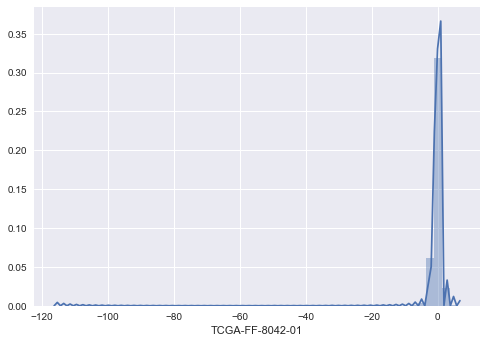

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

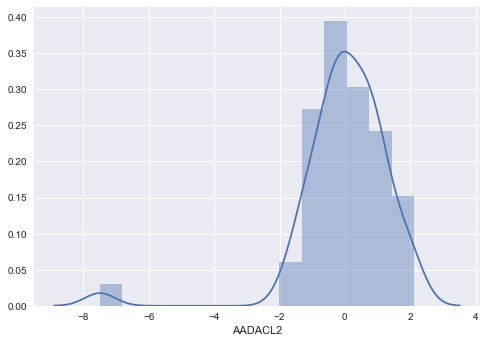

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_dlbc_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18967, 2)

# Save Gene List

In [56]:
filename = path+'tcga_dlbc_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-FA-8693-01,75,MALE,NaN,NaN,NaN,NaN,Diffuse large B-cell lymphoma (DLBCL) NOS (any...,Primary Solid Tumor,Stomach,NaN
TCGA-FA-A4BB-01,67,MALE,NaN,NaN,NaN,NaN,Diffuse large B-cell lymphoma (DLBCL) NOS (any...,Primary Solid Tumor,Liver,NaN
TCGA-FA-A4XK-01,40,MALE,NaN,NaN,NaN,NaN,Diffuse large B-cell lymphoma (DLBCL) NOS (any...,Primary Solid Tumor,Small intestine,NaN
TCGA-FA-A6HN-01,73,MALE,NaN,NaN,NaN,NaN,Diffuse large B-cell lymphoma (DLBCL) NOS (any...,Primary Solid Tumor,NaN,NaN
TCGA-FA-A6HO-01,58,FEMALE,NaN,NaN,NaN,NaN,Diffuse large B-cell lymphoma (DLBCL) NOS (any...,Primary Solid Tumor,NaN,NaN


In [60]:
attribute_list.shape

(48, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_dlbc_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-FA-8693-01,TCGA-FA-A4BB-01,TCGA-FA-A4XK-01,TCGA-FA-A6HN-01,TCGA-FA-A6HO-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-FA-A82F-01,TCGA-FA-A86F-01,TCGA-FF-8041-01,...,TCGA-GS-A9TW-01,TCGA-GS-A9TX-01,TCGA-GS-A9TY-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U3-01,TCGA-GS-A9U4-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-RQ-AAAT-01,TCGA-VB-A8QN-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.909540,0.284007,-0.007632,-0.424281,-0.049250,-0.174448,0.951295,-0.132660,0.659127,0.784325,...,-0.965543,-0.757355,0.117377,-0.549140,-0.299386,-0.674129,0.034057,-0.465870,0.325700,-0.340952
A1CF,-0.337195,-0.753559,-0.212325,-0.503741,0.829812,0.454502,-0.378774,-0.170638,-0.295581,0.662886,...,-0.045487,0.412800,0.287833,-0.128866,-0.003783,0.788139,-0.628605,0.204421,-0.961784,-0.545375
A2M,-0.427842,-0.511096,0.238737,-0.552657,-0.302881,0.905872,0.030507,0.780676,0.280419,-0.469440,...,-0.094601,-0.719284,-0.760922,0.447143,0.864117,-0.136305,0.322139,0.655538,-0.344486,0.113805
A2ML1,-0.719284,-0.052910,-0.969058,0.405375,0.113805,-0.261305,0.905872,-0.178050,-0.219649,0.822475,...,-0.802607,-0.136305,-0.302881,0.989409,-0.552657,0.697198,0.947648,-0.344486,-0.511096,0.238737
A3GALT2,0.823938,-0.426368,-0.884433,-0.134809,-0.842782,-0.134809,0.907436,-0.051357,0.031986,0.949182,...,0.073606,-0.676196,0.198582,-0.551247,-0.218168,-0.467964,0.406869,-0.259866,0.406869,-0.301440


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

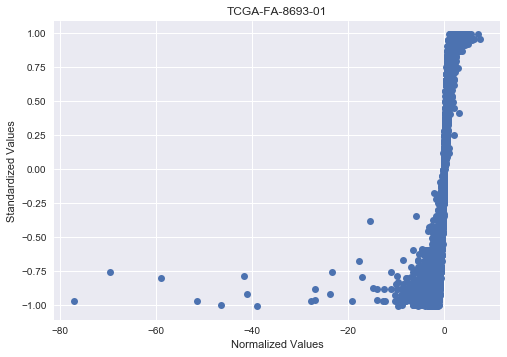

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_dlbc_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-FA-8693-01,TCGA-FA-A4BB-01,TCGA-FA-A4XK-01,TCGA-FA-A6HN-01,TCGA-FA-A6HO-01,TCGA-FA-A7DS-01,TCGA-FA-A7Q1-01,TCGA-FA-A82F-01,TCGA-FA-A86F-01,TCGA-FF-8041-01,...,TCGA-GS-A9TW-01,TCGA-GS-A9TX-01,TCGA-GS-A9TY-01,TCGA-GS-A9TZ-01,TCGA-GS-A9U3-01,TCGA-GS-A9U4-01,TCGA-RQ-A68N-01,TCGA-RQ-A6JB-01,TCGA-RQ-AAAT-01,TCGA-VB-A8QN-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,1,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_dlbc_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [70]:
name = 'tcga_dlbc_gene_up_set'

In [71]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [72]:
name = 'tcga_dlbc_gene_down_set'

In [73]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [74]:
name = 'tcga_dlbc_attribute_up_set'

In [75]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [76]:
name = 'tcga_dlbc_attribute_down_set'

In [77]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [78]:
attribute_normalized_matrix = normalized_matrix.copy()

In [79]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [80]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [81]:
attribute_similarity_matix.head()

,"(Donor:TCGA-FA-8693, Age:75.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:Stomach, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A4BB, Age:67.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:Liver, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A4XK, Age:40.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:Small intestine, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A6HN, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A6HO, Age:58.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A7DS, Age:54.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:Breast, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A7Q1, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A82F, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:Small intestine, Tumor:nan, Gradenan)","(Donor:TCGA-FA-A86F, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-FF-8041, Age:28.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary mediastinal (thymic) DLBCL, Tissue:nan, Tumor:nan, Gradenan)",...,"(Donor:TCGA-GS-A9TW, Age:23.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary mediastinal (thymic) DLBCL, Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-GS-A9TX, Age:37.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-GS-A9TY, Age:82.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-GS-A9TZ, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary mediastinal (thymic) DLBCL, Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-GS-A9U3, Age:77.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-GS-A9U4, Age:27.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site nodal or extranodal), Tissue:nan, Tumor:nan, Gradenan)","(Donor:TCGA-RQ-A68N, Age:63.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary DLBCL of the CNS, Tissue:Brain, Tumor:nan, Gradenan)","(Donor:TCGA-RQ-A6JB, Age:62.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary DLBCL of the CNS, Tissue:Bone, Tumor:nan, Gradenan)","(Donor:TCGA-RQ-AAAT, Age:63.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Primary DLBCL of the CNS, Tissue:Brain, Tumor:nan, Gradenan)","(Donor:TCGA-VB-A8QN, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Diffuse large B-cell lymphoma (DLBCL) NOS (any anatomic site n

# Save Attribute Similarity Matrix

In [82]:
filename = path+'tcga_dlbc_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [83]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [84]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [85]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.399255,-0.285207,-0.129823,0.750527,-0.048709,-0.116022,0.026575,0.084554,0.204529,...,-0.151602,0.151879,-0.238468,-0.049360,-0.124856,0.063462,-0.265853,-0.187416,-0.389598,-0.221237
A1CF,-0.399255,1.000000,0.056758,0.154331,-0.258437,-0.136738,0.002518,-0.045891,0.181660,-0.018201,...,0.043565,-0.102327,0.232979,0.280459,0.123252,-0.074153,0.136171,0.074400,0.277551,0.168213
A2M,-0.285207,0.056758,1.000000,-0.028310,-0.182583,-0.095711,-0.297935,0.051331,-0.018753,-0.168694,...,0.158954,0.063880,0.308408,-0.170845,0.177089,0.079335,0.390563,0.234638,0.407676,0.232737
A2ML1,-0.129823,0.154331,-0.028310,1.000000,0.068420,-0.093974,-0.120046,0.350482,-0.036286,0.160483,...,0.196723,0.065226,0.083275,0.259569,0.065475,-0.103093,0.048615,-0.021005,0.314925,0.154343
A3GALT2,0.750527,-0.258437,-0.182583,0.068420,1.000000,-0.030859,-0.213981,0.123562,0.117562,0.159310,...,0.080472,0.279767,-0.154648,-0.043241,-0.010338,-0.043829,-0.193589,-0.293112,-0.277470,-0.124241


# Save Gene Similarity Matrix

In [86]:
filename = path+'tcga_dlbc_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [87]:
name = 'tcga_dlbc_gene_attribute_edge_list'

In [88]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  48 Out of 48   

 The number of statisticaly relevent gene-attribute associations is: 42973
